In [ ]:
import pandas as pd
import numpy as np

## Data Transformation

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ashishgeorge009/Assignment_2/master/heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df['target'].unique()

array([1, 0])

In [ ]:
y = df['target']
X = df.drop(['target'], axis = 1)

Checking for Correlation

In [ ]:
cor = df.corr()['target'].map(lambda x:abs(x))
cor.sort_values()
#surprisingly cholestrol is not showing correlation

fbs         0.028046
chol        0.085239
restecg     0.137230
trestbps    0.144931
age         0.225439
sex         0.280937
thal        0.344029
slope       0.345877
ca          0.391724
thalach     0.421741
oldpeak     0.430696
cp          0.433798
exang       0.436757
target      1.000000
Name: target, dtype: float64

In [ ]:
#splitting train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [ ]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.tree import export_text
import graphviz

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameters = {'max_depth' : (3,5,8,10,15,24)
              , 'criterion' : ('gini', 'entropy')
              , 'max_features' : ('auto', 'sqrt', 'log2')
              , 'min_samples_split' : (2,4,5)
             }

In [ ]:
 dtree_grid = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = parameters, cv = 5, verbose = True)

In [ ]:
dtree_grid.fit(X_train,y_train)
dtree_grid.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_split=5)

## Decision Tree

In [ ]:
Dtree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [ ]:
Dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       min_samples_split=6)

In [ ]:
pred = Dtree.predict(X_test)

Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        45
           1       0.78      0.85      0.81        46

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [ ]:
print(export_text(Dtree, feature_names=list(X_train.columns)))

|--- cp <= 0.50
|   |--- thal <= 2.50
|   |   |--- oldpeak <= 3.10
|   |   |   |--- exang <= 0.50
|   |   |   |   |--- fbs <= 0.50
|   |   |   |   |   |--- trestbps <= 134.00
|   |   |   |   |   |   |--- chol <= 312.50
|   |   |   |   |   |   |   |--- thal <= 1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- thal >  1.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- chol >  312.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- trestbps >  134.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- fbs >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- exang >  0.50
|   |   |   |   |--- thalach <= 147.00
|   |   |   |   |   |--- oldpeak <= 1.35
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- oldpeak >  1.35
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- thalach >  147.00
|   |   |   |   |   |--- ca <= 1.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |

### Decision Tree plot

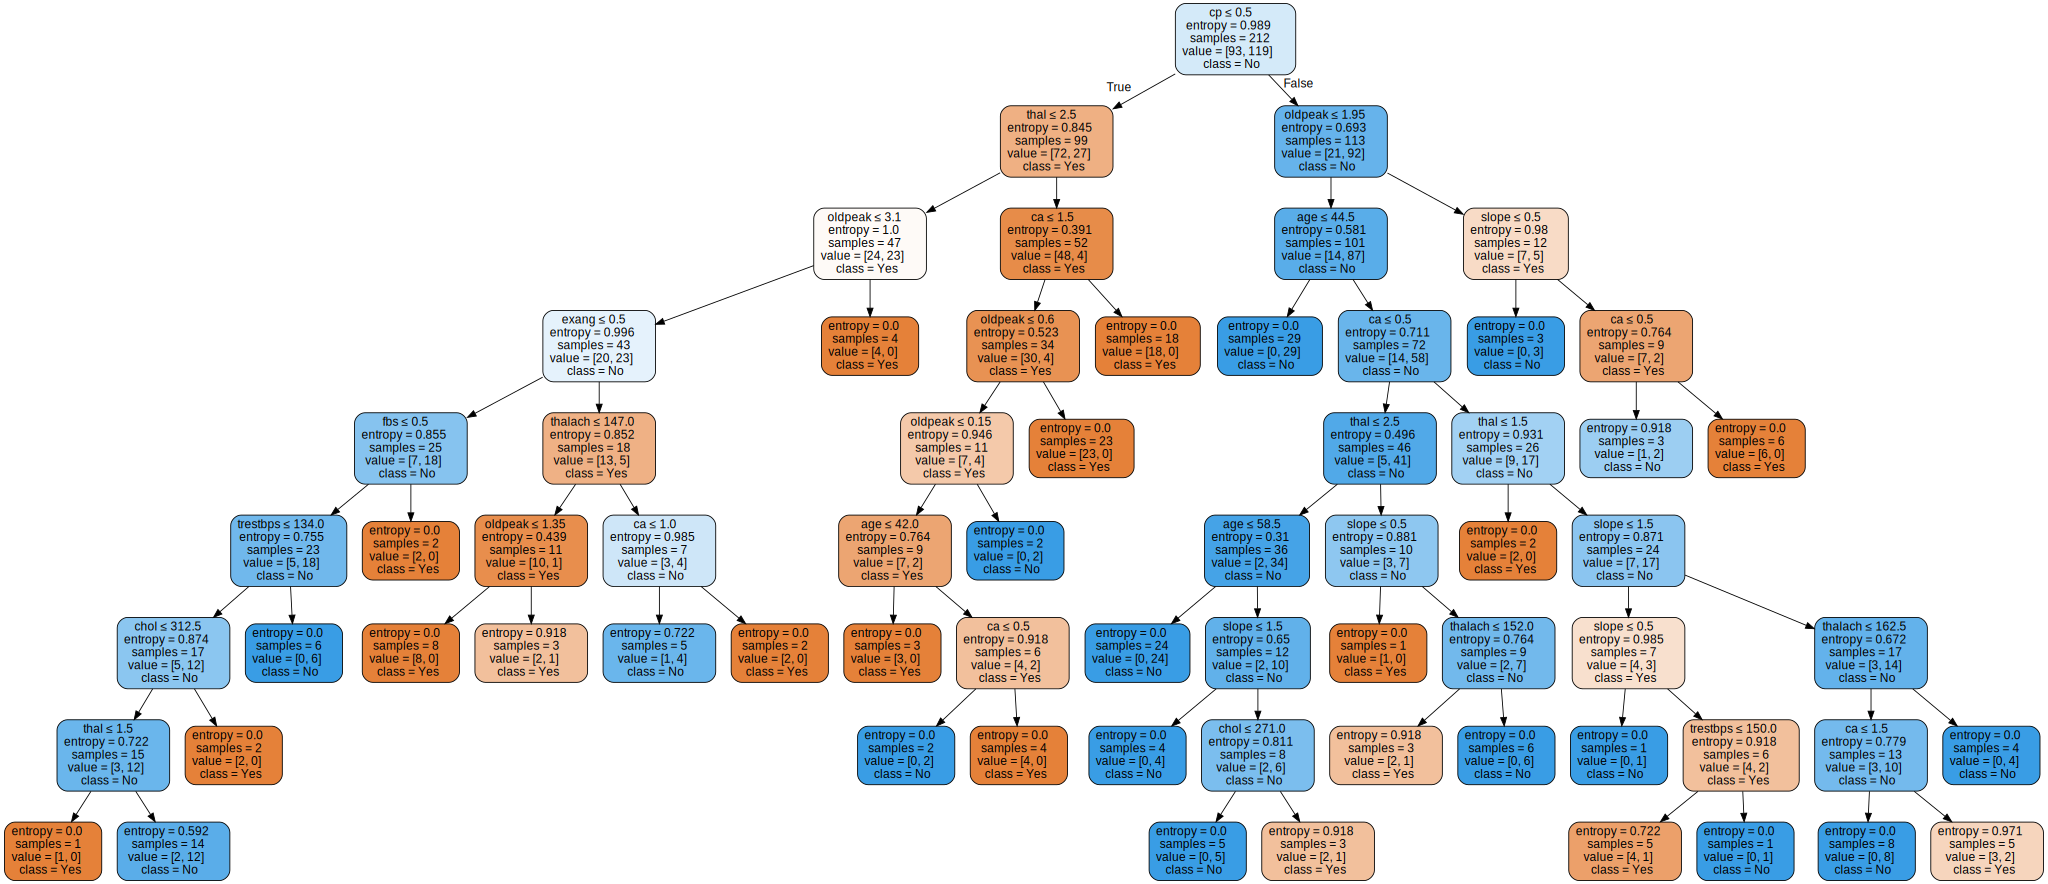

In [ ]:
treeplot = export_graphviz(Dtree,   
                      out_file=None, 
                      feature_names=X_train.columns,        
                      class_names=['Yes','No'],     
                      filled=True, rounded=True,    
                      special_characters=True)  
graph = graphviz.Source(treeplot)  
graph 

In [ ]:
graph.render("Heart_Diesease_plot") 

'Heart_Diesease_plot.pdf'

In [ ]:
df_test = pd.concat([X_test,pd.DataFrame(y_test)], axis=1)

### Cases where the model Failed

In [ ]:
df_test[df_test['target']!=pred]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0
226,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0


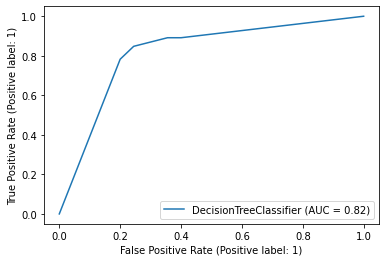

In [ ]:
#ROC Curve
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
roc_stree =plot_roc_curve(Dtree, X_test, y_test)